# Exploratory data analysis (EDA) - Airbnb Prices in Barcelona and Berlin

## Introduction
<p>Airbnb is an online platform for people to rent places to stay which is very popular and a good alternative comparing with trational hotels. People could rent the entire home or just a room with the hosts. 

<p>The datasets I'm going to explore are airbnb dataset of year 2023 of Barcelona and Berlin. Let's discover what insights I could get from there.

## Load the data

In [291]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import numpy as np

In [292]:
df_bcn = pd.read_csv('data/airbnb_bcn.csv')
df_ber = pd.read_csv('data/airbnb_ber.csv')

#### Let's check the datasets.

In [293]:
print(df_bcn.shape)
print(df_ber.shape)

(18321, 18)
(13327, 18)


In [294]:
print(df_bcn.columns)
print(df_ber.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


* As later we are going to combine these 2 datasets, so let's add one column with city's name.

In [295]:

df_bcn['city'] = 'Barcelona'
df_ber['city'] = 'Berlin'

In [296]:
df_bcn.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'city'],
      dtype='object')

In [297]:
df_ber.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'city'],
      dtype='object')

## Clean the data

* The idea is to clean the 2 datasets separately, then combine them together.

#### 1. Let's check if there is any duplicated rows in dataset of Barcelona.

In [298]:
df_bcn.duplicated().sum()

0

#### 2. Let's check the NaN values in dataset of Barcelona.

In [299]:
df_bcn.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             2265
minimum_nights                       0
number_of_reviews                    0
last_review                       4369
reviews_per_month                 4369
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5917
city                                 0
dtype: int64

* As the amount of nan values of price is very large, to avoid affect the result of analysis, will fill with mean value.

In [300]:
mean_bcn_price = np.mean(df_bcn['price'])

In [301]:
df_bcn['price'].fillna(mean_bcn_price, inplace=True)

In [302]:
df_bcn.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4369
reviews_per_month                 4369
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5917
city                                 0
dtype: int64

* To fill nan value of host_name.

In [303]:
df_bcn['host_name'].fillna('no info', inplace=True)

In [304]:
df_bcn.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4369
reviews_per_month                 4369
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5917
city                                 0
dtype: int64

<p>* Now let's deal with the nan values in columns 'last_view' and 'reviews_per_month'. As last_review is not closely related to the goal of the analysis, so we interpolate the missing value.
<p>* After checking 'number_of_reviews_ltm', the values are 0 for the missing values of column 'reviews_per_month', so we just fill 0 for nan values of 'reviews_per_month'. 

In [305]:
df_bcn.iloc[:][['last_review', 'reviews_per_month', 'number_of_reviews_ltm']]

,last_review,reviews_per_month,number_of_reviews_ltm
0,2023-12-04,0.16,9
1,2023-11-07,0.31,7
2,2023-10-16,0.74,26
3,2023-11-25,0.48,11
4,2023-10-18,0.66,16
...,...,...,...
18316,NaN,NaN,0
18317,NaN,NaN,0
18318,NaN,NaN,0
18319,NaN,NaN,0


In [306]:
df_bcn['last_review'] = pd.to_datetime(df_bcn['last_review'], format = "%Y-%m-%d")
df_bcn['last_review'].interpolate(method='linear', inplace=True)

In [307]:
df_bcn['reviews_per_month'].fillna(0,inplace=True)

df_bcn.iloc[:][['last_review', 'reviews_per_month', 'number_of_reviews_ltm']]

,last_review,reviews_per_month,number_of_reviews_ltm
0,2023-12-04,0.16,9
1,2023-11-07,0.31,7
2,2023-10-16,0.74,26
3,2023-11-25,0.48,11
4,2023-10-18,0.66,16
...,...,...,...
18316,2023-12-03,0.00,0
18317,2023-12-03,0.00,0
18318,2023-12-03,0.00,0
18319,2023-12-03,0.00,0


In [308]:
df_bcn.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5917
city                                 0
dtype: int64

* As there are missing values on column 'license', so we fill in with string 'no info'.

In [309]:
df_bcn['license'].fillna('no info', inplace=True)

df_bcn['license'].isna().sum()

0

In [310]:
df_bcn.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
city                              0
dtype: int64

#### 3. Same process should be taken for cleaning Berlin dataset.

In [311]:
df_ber.duplicated().sum()

0

In [312]:
df_ber.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3953
minimum_nights                       0
number_of_reviews                    0
last_review                       3000
reviews_per_month                 3000
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5091
city                                 0
dtype: int64

In [313]:
mean_ber_price = np.mean(df_ber['price'])
df_ber['price'].fillna(mean_ber_price, inplace=True)

In [314]:
df_ber['host_name'].fillna('no info', inplace=True)

In [315]:
df_ber.iloc[:][['last_review', 'reviews_per_month', 'number_of_reviews_ltm']]

,last_review,reviews_per_month,number_of_reviews_ltm
0,2023-05-25,0.84,1
1,2020-01-04,0.07,0
2,2023-11-26,3.92,50
3,2023-11-30,0.16,1
4,2017-12-14,0.29,0
...,...,...,...
13322,NaN,NaN,0
13323,NaN,NaN,0
13324,NaN,NaN,0
13325,NaN,NaN,0


In [316]:
df_ber['last_review'] = pd.to_datetime(df_ber['last_review'], format = "%Y-%m-%d")
df_ber['last_review'].interpolate(method='linear', inplace=True)

In [317]:
df_ber['reviews_per_month'].fillna(0,inplace=True)

In [318]:
df_ber['license'].fillna('no info', inplace=True)

In [319]:
df_ber.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
city                              0
dtype: int64

#### 4. Now let's combine the 2 datasets into a single dataset.

In [320]:
# combine the datasets of Barcelona and Berlin into a single one.

bcn_ber_data = pd.concat([df_bcn, df_ber], ignore_index=True)

bcn_ber_data


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.170440,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,no info,Barcelona
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062,Barcelona
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.214870,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926,Barcelona
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057,Barcelona
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31643,1048290130755102956,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,168840227,Rounak,Pankow,Prenzlauer Berg Nordwest,52.552905,13.400229,Entire home/apt,47.0,1,0,2023-12-17,0.00,1,231,0,First name and Last name: Rounak Kakwani <br/>...,Berlin
31644,1048444986736672883,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,551079357,Esra,Mitte,Alexanderplatz,52.522356,13.426044,Entire home/apt,87.0,2,0,2023-12-17,0.00,1,65,0,First name and Last name: Esra Kocatürk <br/> ...,Berlin
31645,1048535169043506669,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,551034226,Pietro,Charlottenburg-Wilm.,Volkspark Wilmersdorf,52.485782,13.335904,Entire home/apt,58.0,1,0,2023-12-17,0.00,1,171,0,First name and Last name: Pietro manfregola <b...,Berlin
31646,1048637262243761764,Rental unit in Berlin · ★New · 3 bedrooms · 3 ...,29385449,Luis,Mitte,Brunnenstr. Nord,52.544105,13.373386,Entire home/apt,161.0,1,0,2023-12-17,0.00,3,11,0,Legal entity name and Legal form: Spacifik UG ...,Berlin


In [321]:
bcn_ber_data.shape

(31648, 19)

In [322]:
bcn_ber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31648 entries, 0 to 31647
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              31648 non-null  int64         
 1   name                            31648 non-null  object        
 2   host_id                         31648 non-null  int64         
 3   host_name                       31648 non-null  object        
 4   neighbourhood_group             31648 non-null  object        
 5   neighbourhood                   31648 non-null  object        
 6   latitude                        31648 non-null  float64       
 7   longitude                       31648 non-null  float64       
 8   room_type                       31648 non-null  object        
 9   price                           31648 non-null  float64       
 10  minimum_nights                  31648 non-null  int64         
 11  nu

In [323]:
bcn_ber_data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
city                              0
dtype: int64

In [324]:
bcn_ber_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.164800e+04,3.164800e+04,31648.000000,31648.000000,31648.000000,31648.000000,31648.000000,31648,31648.000000,31648.000000,31648.000000,31648.000000
mean,3.099117e+17,1.621615e+08,46.073650,6.898237,125.661561,26.627844,41.093845,2022-11-09 05:31:28.270981120,1.012234,23.480410,149.884069,10.675683
min,3.176000e+03,1.581000e+03,41.352720,2.085593,9.000000,1.000000,0.000000,2011-06-23 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2.009976e+07,1.150212e+07,41.386550,2.165218,64.000000,2.000000,1.000000,2022-12-31 00:00:00,0.020000,1.000000,0.000000,0.000000
50%,4.308470e+07,7.915606e+07,41.406996,2.182664,107.000000,4.000000,7.000000,2023-10-18 00:00:00,0.310000,2.000000,129.000000,1.000000
75%,7.621230e+17,2.981860e+08,52.501730,13.399750,126.494083,32.000000,39.000000,2023-11-26 00:00:00,1.430000,13.000000,285.000000,13.000000
max,1.049081e+18,5.510794e+08,52.656110,13.721390,56815.000000,1124.000000,2363.000000,2023-12-20 00:00:00,67.300000,318.000000,365.000000,1065.000000
std,4.120441e+17,1.737142e+08,5.489419,5.547656,442.982944,44.624482,87.086337,NaN,1.729449,55.781456,138.213176,22.593064


* Notice that the maxmum price is 56815 euros, which seems an outlier. Checked all objects whose price is over 1000 euros, look into the details and found that as per their location where the price shouldn't be that high. So we drop these rows.

In [326]:
bcn_ber_data = bcn_ber_data[bcn_ber_data['price'] < 1000]

In [335]:
bcn_ber_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.154700e+04,3.154700e+04,31547.000000,31547.000000,31547.000000,31547.000000,31547.000000,31547,31547.000000,31547.000000,31547.000000,31547.000000
mean,3.101068e+17,1.621717e+08,46.081224,6.905877,113.592103,26.575332,41.168637,2022-11-09 07:01:35.956042752,1.013348,23.475323,149.691825,10.688148
min,3.176000e+03,1.581000e+03,41.352720,2.085593,9.000000,1.000000,0.000000,2011-06-23 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2.008136e+07,1.157300e+07,41.386520,2.165213,64.000000,2.000000,1.000000,2022-12-31 00:00:00,0.020000,1.000000,0.000000,0.000000
50%,4.306808e+07,7.911691e+07,41.407040,2.182700,106.000000,4.000000,7.000000,2023-10-18 00:00:00,0.310000,2.000000,128.000000,1.000000
75%,7.623296e+17,2.978854e+08,52.501772,13.399804,126.494083,32.000000,39.000000,2023-11-26 00:00:00,1.430000,13.000000,285.000000,13.000000
max,1.049081e+18,5.510794e+08,52.656110,13.721390,999.000000,1100.000000,2363.000000,2023-12-20 00:00:00,67.300000,318.000000,365.000000,1065.000000
std,4.121445e+17,1.737357e+08,5.490629,5.548868,84.586032,43.728995,87.197145,NaN,1.730992,55.797445,138.128723,22.613534


## Exploratory data analysis

#### 1. Let's see what type of room is more popular in Barcelona and Berlin.

In [336]:
bcn_ber_data.room_type.value_counts(normalize=True)

room_type
Entire home/apt    0.614417
Private room       0.365613
Shared room        0.011633
Hotel room         0.008337
Name: proportion, dtype: float64

In [337]:
pd.crosstab(bcn_ber_data['city'], bcn_ber_data['room_type'], normalize = 'index')

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
Barcelona,0.586317,0.007291,0.397566,0.008826
Berlin,0.652939,0.009770,0.321810,0.015482


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='city', ylabel='Count'>

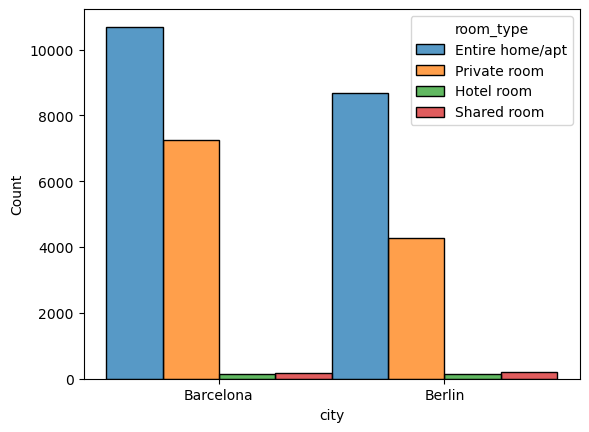

In [344]:
sns.histplot(
    data=bcn_ber_data,
    x='city',
    hue='room_type',
    multiple='dodge'
)

* We can see that entire room/apt is most popular room type((61%)), then private room(36%), only 1% are shared room and only 0.8% are hotel room. 
* The amount of entire home/apt and private room is higher than Berlin while the amount of hotel room and shared room is lower than Berlin. I guess the targeted customers of Barcelona are more like families, couples or a bunch of friends than individuals.

#### 2. Let's see the price per night of Airbnb in Barcelona and Berlin.

Text(0.5, 0, 'room type')

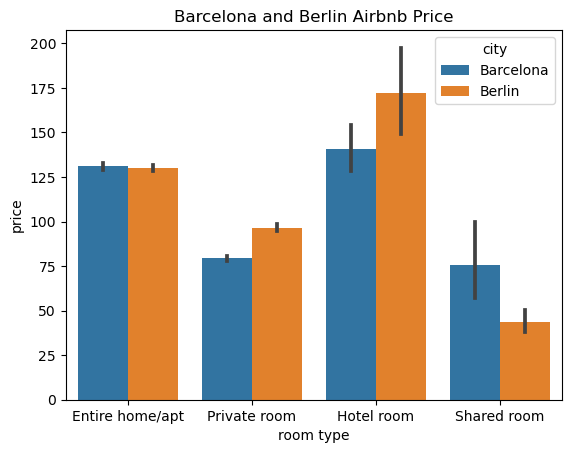

In [361]:
sns.barplot(
    data=bcn_ber_data, 
    x='room_type',
    y='price',
    hue='city'
)
plt.title('Barcelona and Berlin Airbnb Price')
plt.xlabel('room type')


* From the above barchart we can check the average price per night of different room types in Barcelona and Berlin. As we can see, the price of entire home/apt and shared room in Barcelona is actually higher than Berlin, where the price of private room and hotel room is cheaper. 
* I'm curious about why shared room in Barcelona is more expensive than Berlin. I checked the previous histogram related to the number of different room types, it might prove my hypothesis that the visiters for Barcelona are more tending to families, couples than individuals. This might cause the amount of shared room type in Barcelona is lower than Berlin and because of being lack of the amount, but actually there are customers who prefer this room type as this is the cheapest room type, the price actually goes higher? 